<a href="https://colab.research.google.com/github/gauravry/DS_Portfolio/blob/main/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

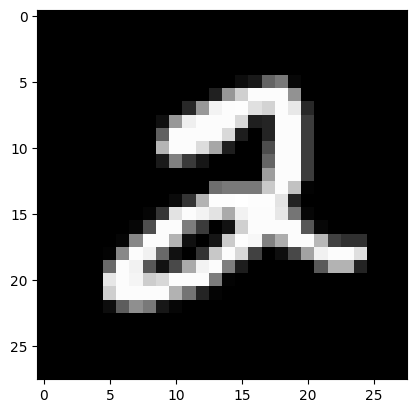

In [23]:
img = x_train[5]
plt.imshow(img,cmap='gray')

In [24]:
# Assuming x_train is your 3D array
x_train_flattened = x_train.reshape(-1, 28*28)

# Check the shape of the flattened array
print(x_train_flattened.shape)

# Assuming x_train is your 3D array
x_test_flattened = x_test.reshape(-1, 28*28)

# Check the shape of the flattened array
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

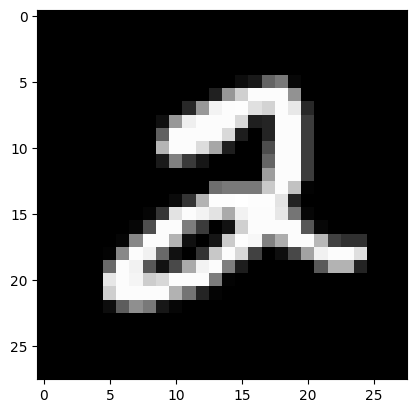

In [27]:
img = x_train_flattened[5].reshape((28,28))
plt.imshow(img,cmap='gray')

### Model Building

In [28]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [29]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [30]:
model.fit(x_train_flattened, y_train, batch_size=64, epochs=5, validation_data=(x_test_flattened, y_test))

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 1.1696 - accuracy: 0.8694 - val_loss: 0.3308 - val_accuracy: 0.9208
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2421 - accuracy: 0.9380 - val_loss: 0.2161 - val_accuracy: 0.9436
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1723 - accuracy: 0.9518 - val_loss: 0.1947 - val_accuracy: 0.9516
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.1352 - accuracy: 0.9611 - val_loss: 0.1736 - val_accuracy: 0.9542
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1223 - accuracy: 0.9651 - val_loss: 0.1584 - val_accuracy: 0.9605


### Model evaluation

In [31]:
model.predict(x_test_flattened).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

313/313 [==============================] - 1s 4ms/step
The predicted label is: [9.9977160e-01 3.4909871e-13 5.1074341e-05 2.3465136e-11 5.1784300e-06
 2.8209718e-07 1.6740244e-04 2.2819189e-07 4.2680454e-06 1.3098398e-07]


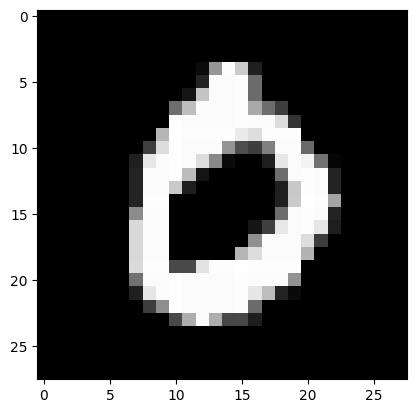

In [43]:
img = x_test_flattened[3].reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(x_test_flattened)[3])

1/1 [==============================] - 0s 69ms/step
The predicted label is: 7


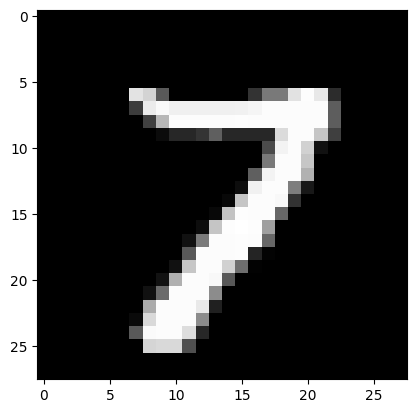

In [67]:
img = x_test_flattened[34].reshape((28, 28))
plt.imshow(img, cmap='gray')
print("The predicted label is:", model.predict(x_test_flattened[[34]]).argmax())


In [69]:


# Assuming model is already defined and trained

# Predict probabilities for all classes
probabilities = model.predict(x_test_flattened[[34]])

# Set numpy print options to suppress scientific notation
np.set_printoptions(suppress=True)

# Retrieve the argmax value
argmax_index = probabilities.argmax()

# Print softmax probabilities along with their indices
for i, prob in enumerate(probabilities[0]):
    print(f"Index: {i}, Probability: {prob}")

# Print the argmax value
print("Argmax Index:", argmax_index)


1/1 [==============================] - 0s 37ms/step
Index: 0, Probability: 7.975769350521134e-12
Index: 1, Probability: 1.6545563141789899e-07
Index: 2, Probability: 0.0002449835592415184
Index: 3, Probability: 4.1659055227682984e-07
Index: 4, Probability: 1.03128530021257e-11
Index: 5, Probability: 3.247764470554193e-12
Index: 6, Probability: 4.824029630617899e-13
Index: 7, Probability: 0.9997541308403015
Index: 8, Probability: 2.2625833651090943e-08
Index: 9, Probability: 3.0615629498242924e-07
Argmax Index: 7
